# Challenge 2: Digit Classifier
I decided to approach this dataset with a convolutional neural network using Keras' sequential model

In [50]:
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

After importing the tools I need, now I need to import the data

In [44]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

### EDA

Understanding the arrays I am working with

In [45]:
X_test.shape

(10000, 28, 28)

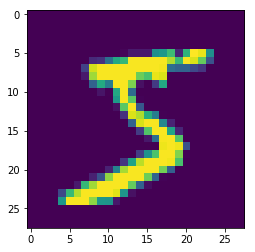

In [46]:
plt.imshow(X_train[0])

In [47]:
X_train[0].shape

(28, 28)

So I know the dimensions are 28 x 28 pixels

### Preprocessing

In [48]:
#reshape data to fit model, add 1 for grayscale image
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [49]:
# I want to convert the numbers to categorical data
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# the sixth entry in the first array should be a 1 with the rest 0
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Model

In [51]:
model = Sequential()

In [52]:
# add layers. Using 64 and 32 nodes respecitively with a kernel size of 3 
# and activated with rectified linear activation unit
model.add(Conv2D(64, kernel_size = 3,activation = "relu", input_shape = (28,28,1)))
model.add(Conv2D(32, kernel_size = 3, activation = "relu"))
#Flatten the array to be used in Dense output array
model.add(Flatten())
# Last layer using softmax activation to get discrete probability distribution resulting in output
model.add(Dense(10, activation = "softmax"))

Next, we compile and optimize our model. I will use the Adam algorithm rather than stochasic gradient descent

In [53]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics=["accuracy"])

Now I will train the model

In [54]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 165s 3ms/step - loss: 0.2234 - accuracy: 0.9507 - val_loss: 0.0817 - val_accuracy: 0.9748
Epoch 2/10
60000/60000 [==============================] - 158s 3ms/step - loss: 0.0665 - accuracy: 0.9792 - val_loss: 0.0894 - val_accuracy: 0.9752
Epoch 3/10
60000/60000 [==============================] - 160s 3ms/step - loss: 0.0444 - accuracy: 0.9861 - val_loss: 0.0850 - val_accuracy: 0.9756
Epoch 4/10
60000/60000 [==============================] - 159s 3ms/step - loss: 0.0359 - accuracy: 0.9886 - val_loss: 0.1103 - val_accuracy: 0.9742
Epoch 5/10
60000/60000 [==============================] - 159s 3ms/step - loss: 0.0275 - accuracy: 0.9911 - val_loss: 0.1007 - val_accuracy: 0.9765
Epoch 6/10
60000/60000 [==============================] - 160s 3ms/step - loss: 0.0216 - accuracy: 0.9931 - val_loss: 0.1118 - val_accuracy: 0.9772
Epoch 7/10
60000/60000 [==============================] - 163s

Given that I trained on 10 epochs, there's a great chance that the model is now **overfitted**, especially given the 99.55% accuracy

### Prediction

Let's predict the first 4 images in the test set and see how accurate our trained model is.

In [55]:
model.predict(X_test[:4])

array([[2.00004745e-18, 7.23541250e-25, 1.50528126e-18, 1.64027993e-12,
        4.93295194e-34, 4.55080695e-30, 2.51491785e-32, 1.00000000e+00,
        3.66660832e-22, 2.10992513e-19],
       [4.15539997e-21, 1.69277632e-17, 1.00000000e+00, 6.95528399e-17,
        1.04924517e-26, 6.24786955e-31, 4.69372243e-16, 1.72265468e-20,
        1.37490343e-20, 7.32112552e-31],
       [7.60964574e-14, 9.99997139e-01, 1.35768186e-09, 1.22667408e-19,
        1.12864484e-09, 5.22014751e-08, 5.83671505e-16, 1.08224985e-10,
        2.83526401e-06, 1.78964067e-19],
       [1.00000000e+00, 1.28341134e-33, 3.67636370e-18, 4.94318703e-24,
        5.47920660e-26, 4.94813495e-22, 9.80498620e-21, 2.54944370e-22,
        8.42432058e-22, 2.53403953e-20]], dtype=float32)

Looking at the highest numbers in each array, it's expecting to see 7, 2, 1, and 0

In [57]:
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

The arrays correspond with our findings exactly.

## Further Questions

**1. Describe why you choose the classifier and the parameters for this task.**

I chose to use a convolutional neural network because convolutions are useful for identifying patterns (in this case, our digits) in order to recognize the different digits. My model had a layer of 64 nodes because I experimented a little bit and struck a balance between computing power and accuracy at 64 and then halved it in the next layer. I thought that my epoch choice of 10 was a little too high after seeing the results as it is very likely the model is overfitted to the dataset. Another approach would have been to do a grid search using scikit-learn and figuring out appropriate batch size and epochs to train the model on.

**2. If the size of the data set is 1B, will your code still work? What are the challenges for training a classifier with big data set that you can think of?**

The code would technically work but would be more expensive to train. Some of the challenges of this would be limiting the number of epochs and designing a network with enough layers to account for the tiny differences in the large set of data. Additionally, 1B images to recognize just 10 unique digits might be overkill for the problem and performing more through preprocessing and possibly dimensionality reduction would make sense.

**3. If we only have 1000 pictures other than the 60,000 pictures, what will do you? Can you show us the modification of the code?**

The number of nodes and epochs would have to be reduced signifcantly or else the model would literally memorize each image and make predictions useless. I would modify the model to run no more than 3 epochs and probably half the number of nodes (32 and 16).

**4. If we take out a digit, for example number "7" from the input and output. What will you code look like?** 

If we removed a number, then the model would probably pick a different number that is still in the input to assign to images that corresponded to the number that was removed from the data. This means our model would be less accurate

**5. Can you use more than one classifier to solve the original problem? Can you submit the code with explanation of why you choose the classifiers and the hyper-parameters of your choice?**

Yes, we can use many. I considered using k-means clustering, a stochastic gradient descent classifier, and a convolutional neural network. k-means ultimately did not make sense for this problem because it would consider each image as a vector so for a 28x28 image that would mean we would have 784 dimension vectors which would be hard to fit and use for predictions. At scale this issue would only become worse. I decided that a CNN would be more flexible when it came to tuning the parameters than the SGD classifier which is why I chose it in the end.

**6. How to evaluate the classifiers?** 

I would evaluate the classifier on how well could they predict the digit in images not from the testing set. It does not matter how accurately the model can predict the testing data if it doesn't work on an external piece of data. The classifier that is most accurate when performing this task is the one that is the best model for it.